
¡Hola, Karla!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">

<b>Revisión 1</b> <a class="tocSkip"></a>


Karla, excelente trabajo con el desarrollo del proyecto, cada vez estas más cercas de convertirte en un cientifico de datos. Haces la carga de los datos, su tratamiento inicial, las gráficas y el desarrollo de la prueba de hipótesis. Solamente te dejo algunos comentario para terminar de complementar el análisis.</div>

# Análisis exploratorio de datos

In [1]:
# Importar librerias
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt

In [2]:
# Importar archivos

taxis = pd.read_csv('/datasets/project_sql_result_01.csv')

neighborhoods = pd.read_csv('/datasets/project_sql_result_04.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

In [3]:
# Información del df taxis
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
# Vista del df taxis
taxis

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


In [5]:
# Cambiar a minúsculas la columna company_name para evitar duplicados
taxis['company_name'] = taxis['company_name'].str.lower()

# Comprobamos
taxis.head()

,company_name,trips_amount
0,flash cab,19558
1,taxi affiliation services,11422
2,medallion leasing,10367
3,yellow cab,9888
4,taxi affiliation service yellow,9299


In [6]:
# Revisar si hay duplicados
taxis.duplicated().sum()

0

In [7]:
# Infromación del df neighborhoods
neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [8]:
# Vista del df neighborhoods
neighborhoods

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


In [9]:
# Cambiar a minúsculas la columna dropoff_location_name para evitar duplicados
neighborhoods['dropoff_location_name'] = neighborhoods['dropoff_location_name'].str.lower()

# comprobamos
neighborhoods.head()

,dropoff_location_name,average_trips
0,loop,10727.466667
1,river north,9523.666667
2,streeterville,6664.666667
3,west loop,5163.666667
4,o'hare,2546.900000


In [10]:
# Revisar si hay duplicados
neighborhoods.duplicated().sum()

0

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Excelente trabajo con el análisis de duplicados, como aprendiste en cursos anteriores esto es fundamental para asegurar que nuestros resultados no estarán sesgados

In [11]:
# Identificar los 10 principales barrios en términos de finalización del recorrido
neighborhoods.sort_values('average_trips',ascending=False)

neighborhoods.head(10)

,dropoff_location_name,average_trips
0,loop,10727.466667
1,river north,9523.666667
2,streeterville,6664.666667
3,west loop,5163.666667
4,o'hare,2546.900000
5,lake view,2420.966667
6,grant park,2068.533333
7,museum campus,1510.000000
8,gold coast,1364.233333
9,sheffield & depaul,1259.766667


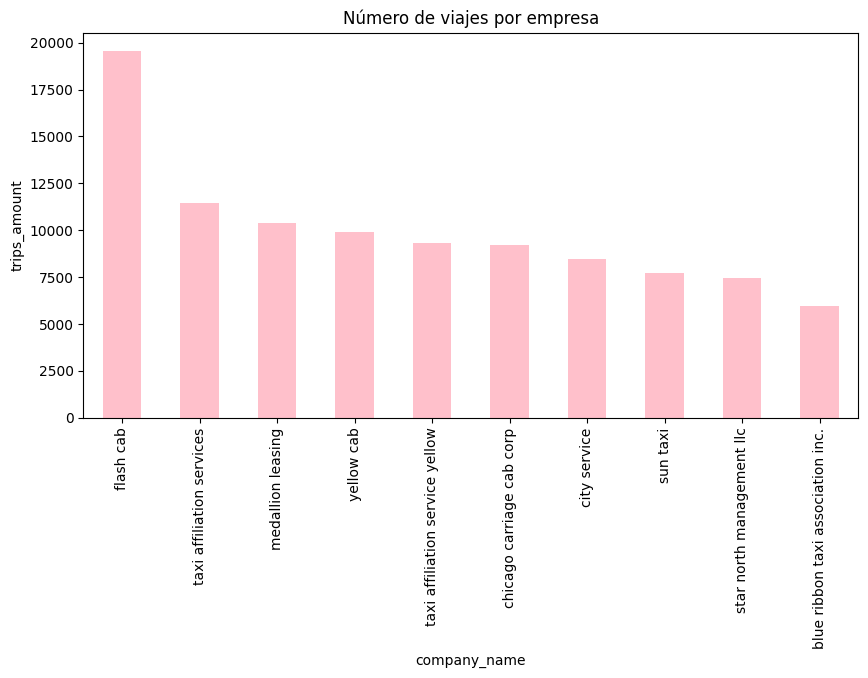

In [12]:
# Hacer gráfico: empresas de taxis y número de viajes

amount_trips = taxis[taxis['trips_amount'] > 5500]
amount_trips.plot(kind='bar',x='company_name',title='Número de viajes por empresa',figsize=(10,5),color='pink',legend=False)

plt.xlabel('company_name')
plt.ylabel('trips_amount')
plt.show()

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con la gráfica solamente mostrando el top 10 viajes por empresas de taxi

Las 3 empresas que superan los 10 mil viajes son:

- flash cab
- taxi affiliation services	
- medallion leasing

Esto se puede deber a diferentes factores como a la comodidad del vehículo, atenciones, precio,etc

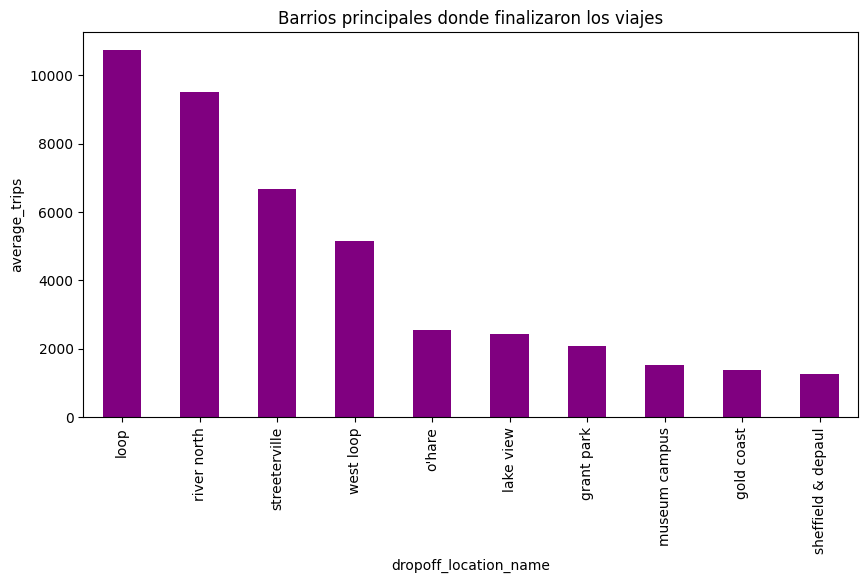

In [13]:
# Hacer gráfico: los 10 barrios principales por número de finalizaciones

main_neighborhoods = neighborhoods[neighborhoods['average_trips'] > 1259]
main_neighborhoods.plot(kind='bar',x='dropoff_location_name',title='Barrios principales donde finalizaron los viajes',figsize=(10,5),color='purple',legend=False)

plt.xlabel('dropoff_location_name')
plt.ylabel('average_trips')
plt.show()

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el desarrollo de este análisis y lo complementaste con una gráfica.
    </div>

Los 3 barrios que tienen más finalización de viajes son:

- loop
- river north
- streeterville

Esto se debe a que puede haber lugares turísticos por ahí, puede ser un barrio con mucha población,centros de entretenimiento, oficinas, etc.

# Prueba de hipótesis

In [14]:
# Leer archivo de la última consulta
loop = pd.read_csv('/datasets/project_sql_result_07.csv')

In [15]:
# Información del df
loop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [17]:
# Ver df loop
loop

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [16]:
# Cambiar columna start_ts a tipo de dato fecha

loop['start_ts'] = pd.to_datetime(loop['start_ts'])

loop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [18]:
# Cmbiar a minúsculas para evitar duplicados

loop['weather_conditions'] = loop['weather_conditions'].str.lower()
loop.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,good,2410.0
1,2017-11-25 14:00:00,good,1920.0
2,2017-11-25 12:00:00,good,1543.0
3,2017-11-04 10:00:00,good,2512.0
4,2017-11-11 07:00:00,good,1440.0


In [19]:
# Revisar valores nulos
loop.isnull().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [20]:
# Revisar valores duplicados
loop.duplicated().sum()

197

In [21]:
# Eliminar duplicados
loop = loop.drop_duplicates().reset_index(drop=True)

loop

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,good,2410.0
1,2017-11-25 14:00:00,good,1920.0
2,2017-11-25 12:00:00,good,1543.0
3,2017-11-04 10:00:00,good,2512.0
4,2017-11-11 07:00:00,good,1440.0
...,...,...,...
866,2017-11-04 14:00:00,good,2700.0
867,2017-11-18 16:00:00,bad,2186.0
868,2017-11-25 11:00:00,good,0.0
869,2017-11-11 10:00:00,good,1318.0


In [22]:
# Confirmar valores duplicados
loop.duplicated().sum()

0

In [23]:
# Revisar si hay viajes que duran 0 segundos y filtarlos

loop = loop[loop['duration_seconds'] >= 1]
loop

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,good,2410.0
1,2017-11-25 14:00:00,good,1920.0
2,2017-11-25 12:00:00,good,1543.0
3,2017-11-04 10:00:00,good,2512.0
4,2017-11-11 07:00:00,good,1440.0
...,...,...,...
865,2017-11-11 10:00:00,good,1303.0
866,2017-11-04 14:00:00,good,2700.0
867,2017-11-18 16:00:00,bad,2186.0
869,2017-11-11 10:00:00,good,1318.0


In [24]:
# Estadística de datos

loop.describe()

,duration_seconds
count,865.000000
mean,2110.849711
std,765.162920
min,60.000000
25%,1454.000000
50%,2037.000000
75%,2591.000000
max,7440.000000


### Prueba la hipótesis:  

Hipótesis nula:
"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos".

Hipótesis alternativa:
"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

In [25]:
# Extraer la fecha de la columna start_ts

loop['only_date'] = loop['start_ts'].dt.date
loop

/tmp/ipykernel_251/2207710949.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop['only_date'] = loop['start_ts'].dt.date


,start_ts,weather_conditions,duration_seconds,only_date
0,2017-11-25 16:00:00,good,2410.0,2017-11-25
1,2017-11-25 14:00:00,good,1920.0,2017-11-25
2,2017-11-25 12:00:00,good,1543.0,2017-11-25
3,2017-11-04 10:00:00,good,2512.0,2017-11-04
4,2017-11-11 07:00:00,good,1440.0,2017-11-11
...,...,...,...,...
865,2017-11-11 10:00:00,good,1303.0,2017-11-11
866,2017-11-04 14:00:00,good,2700.0,2017-11-04
867,2017-11-18 16:00:00,bad,2186.0,2017-11-18
869,2017-11-11 10:00:00,good,1318.0,2017-11-11


In [26]:
# Filtramos clima lluvioso = bad

bad_conditions = loop[loop['weather_conditions'] == 'bad']
bad_conditions

,start_ts,weather_conditions,duration_seconds,only_date
6,2017-11-04 16:00:00,bad,2969.0,2017-11-04
30,2017-11-18 12:00:00,bad,1980.0,2017-11-18
34,2017-11-04 17:00:00,bad,2460.0,2017-11-04
51,2017-11-04 16:00:00,bad,2760.0,2017-11-04
52,2017-11-18 12:00:00,bad,2460.0,2017-11-18
...,...,...,...,...
846,2017-11-18 12:00:00,bad,2560.0,2017-11-18
847,2017-11-18 10:00:00,bad,1908.0,2017-11-18
861,2017-11-18 12:00:00,bad,2400.0,2017-11-18
867,2017-11-18 16:00:00,bad,2186.0,2017-11-18


In [27]:
# Promedio de duración de los viajes (del df loop, sin importar el clima)

avg = loop['duration_seconds'].mean()
avg

2110.849710982659

In [28]:
# extraer el valor p de los resultados de la prueba)

alpha = 0.05
results = st.ttest_1samp(bad_conditions['duration_seconds'],avg)

print('Valor-p: ',results.pvalue)

Valor-p:  3.3934371090112425e-06


In [29]:
# compara el valor p con el umbral alpha

if (results.pvalue < alpha):
    print('Rechazamos la hipótesis nula')
else:
    print("No podemos rechazar la hipótesis nula")

Rechazamos la hipótesis nula


<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Karla, gran trabajo con la prueba de hipótesis para mostrar si la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos. Esta la puedes complementar con la prueba st.ttest_ind y adicionalmente la prueba de levene para mostrar si las vairanzas son iguales

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Como recomendación, te sugiero hacer un análisis de valores atípicos que puedan estar sesgando nuestros resultados
    
</div>

# Conclusión

Decidí usar una prueba de 2 colas puesto que no se sabe si la media va a aumentar o disminuir.

Rechazamos la hipotesis nula de que "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos"


Esto quiere decir que la duración promedio de los viajes si cambia los días que hay lluvia, esto se puede deber a que hay más tráfico, puede haber inundaciones, etc.

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Karla, en general, considero que realizaste un excelente trabajo con el proyecto. Lograste limpiar y organizar las bases de datos eficazmente. Además, tu análisis exploratorio fue exhaustivo, presentando resultados relevantes que serán muy útiles para la toma de decisiones. También, desarrollaste las pruebas de hipótesis de manera acertada. Sin embargo, siempre hay espacio para mejorar y quisiera señalar algunos aspectos que podrías considerar:



    
*  Realizar análisis complementarios eliminando los valores que parecen ser atípicos.    

    
    
</div>